# Warning :
# Do "File -> Save a copy in Drive" before you start modifying the notebook, otherwise your modifications will not be saved.


In [38]:
import argparse
import os
import time

import PIL
from PIL import Image

import numpy as np
import torchvision
import pickle

import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.utils.data
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.autograd import Variable

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Partie 1 : Architecture VGG16

In [ ]:
#!wget https://github.com/cdancette/deep-learning-polytech-tp6-7/raw/master/tp8/imagenet_classes.pkl
!wget https://github.com/rdfia/rdfia.github.io/raw/master/data/3-a/imagenet_classes.pkl

# Bonus : Classifiez des exemples avec vgg16 et commentez le résultat dans votre rapport.
!wget --content-disposition https://unsplash.com/photos/gKXKBY-C-Dk/download?force=true -O cat.jpg
!wget --content-disposition https://unsplash.com/photos/qO-PIF84Vxg/download?force=true -O dog.jpg

--2025-11-19 15:33:04--  https://github.com/rdfia/rdfia.github.io/raw/master/data/3-a/imagenet_classes.pkl
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/3-a/imagenet_classes.pkl [following]
--2025-11-19 15:33:04--  https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/3-a/imagenet_classes.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35454 (35K) [text/plain]
Saving to: ‘imagenet_classes.pkl’

imagenet_classes.pk 100%[===================>]  34.62K  --.-KB/s    in 0.001s  

2025-11-19 15:33:04 (23.5 MB/s) - ‘imagenet_classes.pkl’ saved [35454

Image initialization size: (5026, 3458)

Resized image:  (3, 224, 224)

Image size after normalization:  (3, 224, 224)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:05<00:00, 102MB/s] 



Predicted class:  Egyptian cat


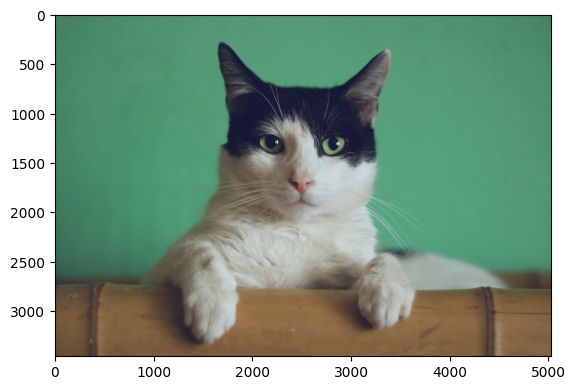

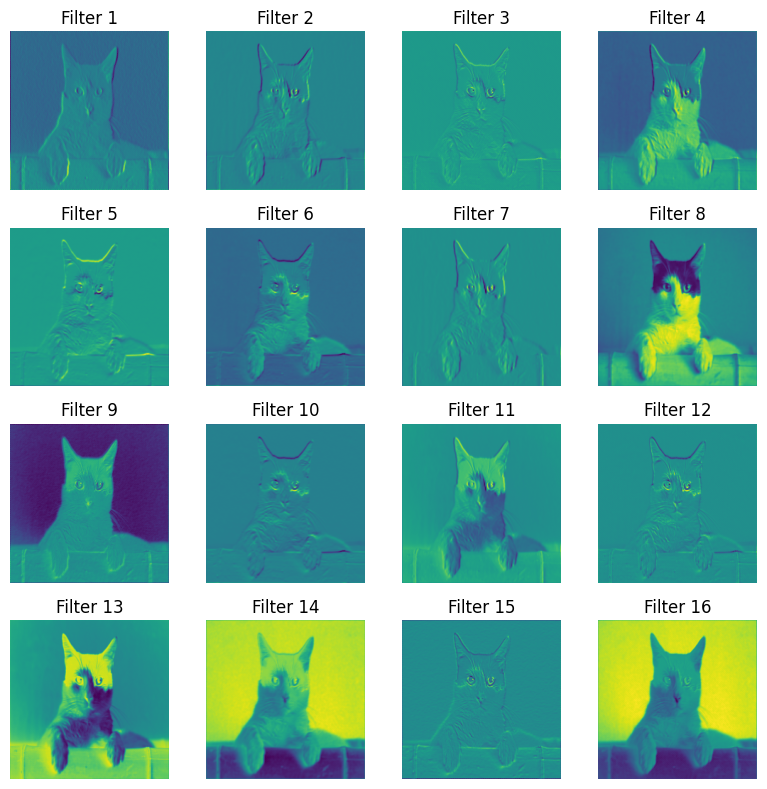

In [ ]:
nameim = "cat"+".jpg"
img = Image.open(nameim)
plt.imshow(img)

# Loading ImageNet classes
imagenet_classes = pickle.load(open('imagenet_classes.pkl', 'rb'))

print("Image initialization size:", img.size)

# Normalization
img = img.resize((224, 224), Image.BILINEAR)
img = np.array(img, dtype=np.float32) / 255
img = img.transpose((2, 0, 1))

print("\nResized image: ", img.shape)

# ImageNet mean/std
mu = torch.Tensor([0.485, 0.456, 0.406])
sigma = torch.Tensor([0.229, 0.224, 0.225])
# Expand mu & sigma to match image size
# YOUR CODE HERE
mu = np.resize(mu, (3,224,224))
sigma = np.resize(sigma, (3,224,224))
# compute the normalized image with mean ImageNet image
# img = YOUR CODE HERE
img = img - mu
img = img / sigma

print("\nImage size after normalization: ", img.shape)

# Loding pre-trained VGG
vgg16 = torchvision.models.vgg16(weights=models.VGG16_Weights.DEFAULT)
vgg16.eval() # eval mod to not calculate gradients for faster computation

# Forward pass on VGG
img = np.expand_dims(img, 0)
x = torch.Tensor(img)
y = vgg16(x) # TODO calcul forward
y = y.squeeze(0).detach().numpy()

# Get prediction (i.e., ImageNet class label)
# YOUR CODE HERE
print("\nPredicted class: ", imagenet_classes[np.argmax(y)])


# first layer
first_conv_layer = vgg16.features[0]

# activation maps
with torch.no_grad():
    activation_maps = first_conv_layer(x)
activation_maps = activation_maps.squeeze(0).detach().cpu().numpy()

# Visualization
num_filters = activation_maps.shape[0]
plt.figure(figsize=(8, 8))

for i in range(min(16, num_filters)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(activation_maps[i], cmap='viridis')
    plt.axis('off')
    plt.title(f"Filter {i+1}")

plt.tight_layout()
plt.show()

Image initialization size: (5184, 3456)

Resized image:  (3, 224, 224)

Image size after normalization:  (3, 224, 224)

Predicted class:  Lakeland terrier


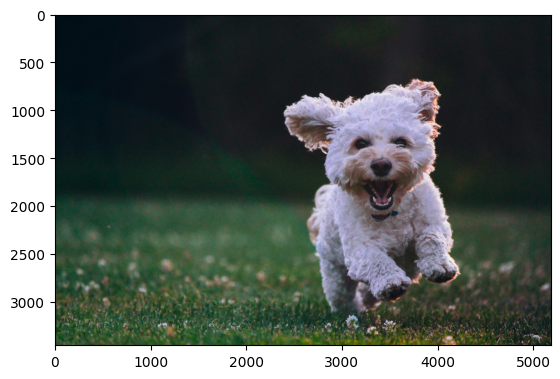

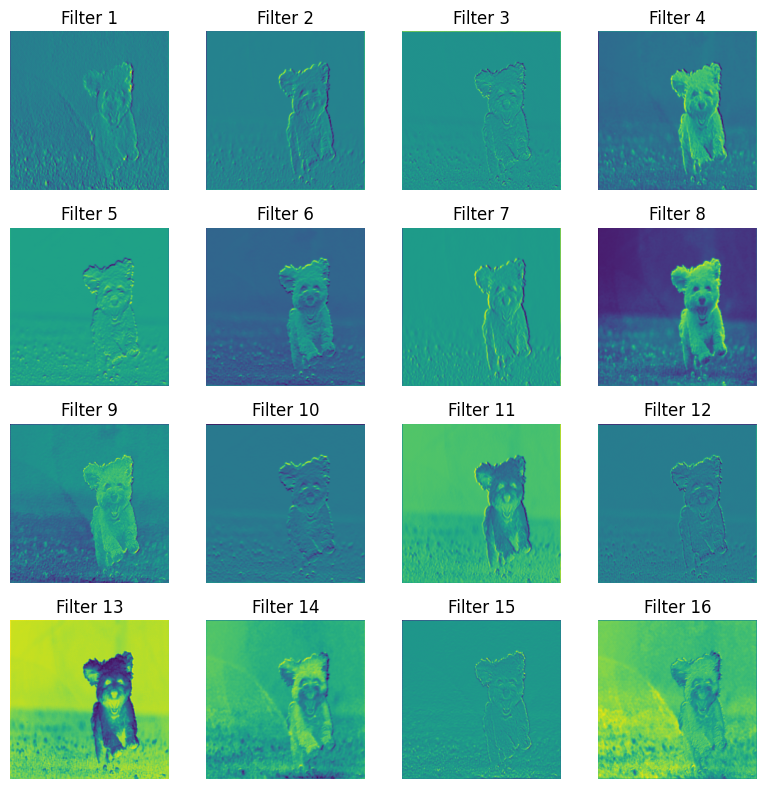

In [ ]:
nameim = "dog"+".jpg"
img = Image.open(nameim)
plt.imshow(img)

# Loading ImageNet classes
imagenet_classes = pickle.load(open('imagenet_classes.pkl', 'rb'))

print("Image initialization size:", img.size)

# Normalization
img = img.resize((224, 224), Image.BILINEAR)
img = np.array(img, dtype=np.float32) / 255
img = img.transpose((2, 0, 1))

print("\nResized image: ", img.shape)

# ImageNet mean/std
mu = torch.Tensor([0.485, 0.456, 0.406])
sigma = torch.Tensor([0.229, 0.224, 0.225])
# Expand mu & sigma to match image size
# YOUR CODE HERE
mu = np.resize(mu, (3,224,224))
sigma = np.resize(sigma, (3,224,224))
# compute the normalized image with mean ImageNet image
# img = YOUR CODE HERE
img = img - mu
img = img / sigma

print("\nImage size after normalization: ", img.shape)

# Loding pre-trained VGG
vgg16 = torchvision.models.vgg16(weights=models.VGG16_Weights.DEFAULT)
vgg16.eval() # eval mod to not calculate gradients for faster computation

# Forward pass on VGG
img = np.expand_dims(img, 0)
x = torch.Tensor(img)
y = vgg16(x) # TODO calcul forward
y = y.squeeze(0).detach().numpy()

# Get prediction (i.e., ImageNet class label)
# YOUR CODE HERE
print("\nPredicted class: ", imagenet_classes[np.argmax(y)])


# first layer
first_conv_layer = vgg16.features[0]

# activation maps
with torch.no_grad():
    activation_maps = first_conv_layer(x)
activation_maps = activation_maps.squeeze(0).detach().cpu().numpy()

# Visualization
num_filters = activation_maps.shape[0]
plt.figure(figsize=(8, 8))

for i in range(min(16, num_filters)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(activation_maps[i], cmap='viridis')
    plt.axis('off')
    plt.title(f"Filter {i+1}")

plt.tight_layout()
plt.show()

# Partie 2: Transfer Learning avec VGG16 sur 15 Scene

In [2]:
#!wget https://github.com/cdancette/deep-learning-polytech-tp6-7/raw/master/tp8/15ScenesData.zip
!wget https://github.com/rdfia/rdfia.github.io/raw/master/data/3-a/15ScenesData.zip

!unzip 15ScenesData.zip

--2026-01-10 13:52:58--  https://github.com/rdfia/rdfia.github.io/raw/master/data/3-a/15ScenesData.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/3-a/15ScenesData.zip [following]
--2026-01-10 13:52:58--  https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/3-a/15ScenesData.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86520868 (83M) [application/zip]
Saving to: ‘15ScenesData.zip’

15ScenesData.zip    100%[===================>]  82.51M   318MB/s    in 0.3s    

2026-01-10 13:53:00 (318 MB/s) - ‘15ScenesData.zip’ saved [86520868/86520868]

In [3]:
ls 15SceneData/test/bedroom/

image_0003.jpg  image_0042.jpg  image_0082.jpg  image_0124.jpg  image_0170.jpg
image_0004.jpg  image_0043.jpg  image_0084.jpg  image_0128.jpg  image_0175.jpg
image_0006.jpg  image_0047.jpg  image_0086.jpg  image_0130.jpg  image_0176.jpg
image_0007.jpg  image_0049.jpg  image_0087.jpg  image_0131.jpg  image_0180.jpg
image_0008.jpg  image_0050.jpg  image_0088.jpg  image_0134.jpg  image_0182.jpg
image_0011.jpg  image_0052.jpg  image_0090.jpg  image_0135.jpg  image_0189.jpg
image_0013.jpg  image_0053.jpg  image_0092.jpg  image_0138.jpg  image_0190.jpg
image_0014.jpg  image_0054.jpg  image_0093.jpg  image_0140.jpg  image_0191.jpg
image_0016.jpg  image_0056.jpg  image_0095.jpg  image_0141.jpg  image_0192.jpg
image_0017.jpg  image_0059.jpg  image_0096.jpg  image_0142.jpg  image_0195.jpg
image_0018.jpg  image_0060.jpg  image_0097.jpg  image_0144.jpg  image_0196.jpg
image_0019.jpg  image_0062.jpg  image_0098.jpg  image_0148.jpg  image_0200.jpg
image_0020.jpg  image_0063.jpg  image_0103.jpg  imag

In [5]:
vgg16 = models.vgg16(weights=models.VGG16_Weights.DEFAULT)
vgg16

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:04<00:00, 125MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [29]:
class VGG16relu7(nn.Module):
  def __init__(self):
    super(VGG16relu7, self).__init__()
    # Copy the entire convolutional part
    self.features = nn.Sequential( *list(vgg16.features.children()))
    # Keep a piece of the classifier: -2 to stop at relu7
    self.classifier = nn.Sequential(*list(vgg16.classifier.children())[:-2])
  def forward(self, x):
    x = self.features(x)
    x = x.view(x.size(0), -1)
    x = self.classifier(x)
    return x


VGG16relu7()

VGG16relu7(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dil

In [30]:
class VGG16relu6(nn.Module):
  def __init__(self):
    super(VGG16relu6, self).__init__()
    # Copy the entire convolutional part
    self.features = nn.Sequential( *list(vgg16.features.children()))
    # Keep a piece of the classifier: -5 to stop at relu6
    self.classifier = nn.Sequential(*list(vgg16.classifier.children())[:-5])
  def forward(self, x):
    x = self.features(x)
    x = x.view(x.size(0), -1)
    x = self.classifier(x)
    return x

VGG16relu6()

VGG16relu6(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dil

In [31]:
class VGG16bloc5(nn.Module):
  def __init__(self):
    super(VGG16bloc5, self).__init__()
    # Copy the entire convolutional part
    self.features = nn.Sequential( *list(vgg16.features.children()))
  def forward(self, x):
    x = self.features(x)
    x = x.view(x.size(0), -1)
    return x

VGG16bloc5()

VGG16bloc5(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dil

In [32]:
class VGG16bloc4(nn.Module):
  def __init__(self):
    super(VGG16bloc4, self).__init__()
    # Copy the entire convolutional part
    self.features = nn.Sequential( *list(vgg16.features.children())[:-7])
  def forward(self, x):
    x = self.features(x)
    x = x.view(x.size(0), -1)
    return x

VGG16bloc4()

VGG16bloc4(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dil

In [33]:
PRINT_INTERVAL = 50
CUDA = True

def get_dataset(batch_size, path):

    # This function expands 3 times a gray level image
    # to transform it into an image RGB. Use it with transform.Lambda
    def duplicateChannel(img):
        img = img.convert('L')
        np_img = np.array(img, dtype=np.uint8)
        np_img = np.dstack([np_img, np_img, np_img])
        img = Image.fromarray(np_img, 'RGB')
        return img
    def resizeImage(img):
      return img.resize((224,224), Image.BILINEAR)
    def toTensor(img):
      return torch.Tensor(img)


    #####################
    ## YOUR CODE HERE  ##
    #####################
    train_transform = transforms.Compose([
        transforms.Lambda(duplicateChannel),
        transforms.Resize((224, 224), interpolation=Image.BILINEAR),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    val_transform = transforms.Compose([
        transforms.Lambda(duplicateChannel),
        transforms.Resize((224, 224), interpolation=Image.BILINEAR),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    train_dataset = datasets.ImageFolder(path + '/train', transform=train_transform)
    val_dataset = datasets.ImageFolder(path + '/test', transform=val_transform)
    ####################
    ##      END        #
    ####################

    train_loader = torch.utils.data.DataLoader(train_dataset,
                        batch_size=batch_size, shuffle=False, pin_memory=CUDA, num_workers=2)
    val_loader = torch.utils.data.DataLoader(val_dataset,
                        batch_size=batch_size, shuffle=False, pin_memory=CUDA, num_workers=2)

    return train_loader, val_loader

In [34]:
train, test = get_dataset(path="15SceneData", batch_size=8)

print((next(iter(train)))[0].shape, (next(iter(train)))[1].shape)

model = VGG16relu7()
model.eval()
for i, (input, target) in enumerate(train):
  if i % PRINT_INTERVAL == 0:
      print('Batch {0:03d}/{1:03d}'.format(i, len(train)))

  if CUDA:
      input = input.cuda()
      model = model.cuda()
  # Extraire les caractéristiques du batch courant
  features = model(input)
  print(features.shape)
  break

/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')
/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')
/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')
/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')


torch.Size([8, 3, 224, 224]) torch.Size([8])


/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')
/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')


Batch 000/188
torch.Size([8, 4096])


In [35]:

def extract_features(data, model):
    #####################
    ## YOUR CODE HERE  ##
    #####################

    num_samples = len(data.dataset)

    #####################
    ##      END        ##
    #####################

    # Désactiver les gradients pour économiser la mémoire
    model.eval()
    with torch.no_grad():
        start_idx = 0
        for i, (input, target) in enumerate(data):
            if i % PRINT_INTERVAL == 0:
                print('Batch {0:03d}/{1:03d}'.format(i, len(data)))

            if CUDA:
                input = input.cuda()

            # Extraire les caractéristiques du batch courant
            features = model(input)
            batch_size = input.size(0)

            if i == 0:
              X = torch.zeros((num_samples, features.shape[1])).cpu().numpy()
              y = torch.zeros(num_samples, dtype=torch.long).cpu().numpy()

            # Stocker les caractéristiques et les étiquettes dans les matrices pré-allouées
            X[start_idx:start_idx + batch_size] = features.cpu().numpy()
            y[start_idx:start_idx + batch_size] = target.cpu().numpy()

            start_idx += batch_size

    X = X / np.linalg.norm(X, axis=1, keepdims=True)

    return X, y


def main(model, path="15SceneData", batch_size=8):

    #####################
    ## YOUR CODE HERE  ##
    #####################
    model = model
    ####################
    ##      END        #
    ####################

    model.eval()
    if CUDA: # si on fait du GPU, passage en CUDA
        cudnn.benchmark = True
        model = model.cuda()

    print('Récupération des données')
    train, test = get_dataset(batch_size, path)

    print('Feature extraction')
    X_train, y_train = extract_features(train, model)
    X_test, y_test = extract_features(test, model)
    print("dimension des features: ", X_train[0].shape)
    #####################
    ## Votre code ici  ##
    #####################
    print('Apprentissage des SVM')
    svm = LinearSVC(C=1.0, random_state=0, max_iter=2000)
    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    ####################
    ##      FIN        #
    ####################
    print('Accuracy = %f' % accuracy)


Full Network

In [39]:
model = models.vgg16(weights=models.VGG16_Weights.DEFAULT)
main(model, "15SceneData", 8)

Récupération des données
Feature extraction


/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')
/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')


Batch 000/188
Batch 050/188
Batch 100/188
Batch 150/188


/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')
/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')


Batch 000/374
Batch 050/374
Batch 100/374
Batch 150/374
Batch 200/374
Batch 250/374
Batch 300/374
Batch 350/374
dimension des features:  (1000,)
Apprentissage des SVM
Accuracy = 0.869682


VGG16ReLU7

In [40]:
model = VGG16relu7()
main(model, "15SceneData", 8)

Récupération des données
Feature extraction


/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')
/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')


Batch 000/188
Batch 050/188
Batch 100/188
Batch 150/188


/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')
/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')


Batch 000/374
Batch 050/374
Batch 100/374
Batch 150/374
Batch 200/374
Batch 250/374
Batch 300/374
Batch 350/374
dimension des features:  (4096,)
Apprentissage des SVM
Accuracy = 0.888107


VGG16relu6 version

In [ ]:
model = VGG16relu6()
main(model, "15SceneData", 8)

Récupération des données
Feature extraction


/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')
/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')


Batch 000/188
Batch 050/188
Batch 100/188
Batch 150/188


/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')
/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')


Batch 000/374
Batch 050/374
Batch 100/374
Batch 150/374
Batch 200/374
Batch 250/374
Batch 300/374
Batch 350/374
dimension des features:  (4096,)
Apprentissage des SVM
Accuracy = 0.901508


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


VGG16bloc5 version

In [41]:
model = VGG16bloc5()
main(model, "15SceneData", 8)

Récupération des données
Feature extraction


/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')
/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')


Batch 000/188
Batch 050/188
Batch 100/188
Batch 150/188


/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')
/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')


Batch 000/374
Batch 050/374
Batch 100/374
Batch 150/374
Batch 200/374
Batch 250/374
Batch 300/374
Batch 350/374
dimension des features:  (25088,)
Apprentissage des SVM
Accuracy = 0.899832


VGG16bloc4 version

In [42]:
model = VGG16bloc4()
main(model, "15SceneData", 8)

Récupération des données
Feature extraction


/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')
/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')


Batch 000/188
Batch 050/188
Batch 100/188
Batch 150/188


/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')
/tmp/ipython-input-3385644060.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGB')


Batch 000/374
Batch 050/374
Batch 100/374
Batch 150/374
Batch 200/374
Batch 250/374
Batch 300/374
Batch 350/374
dimension des features:  (100352,)
Apprentissage des SVM
Accuracy = 0.886767
